In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['Signal','Density']

In [5]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot:xlabel='Signal', ylabel='Density'>

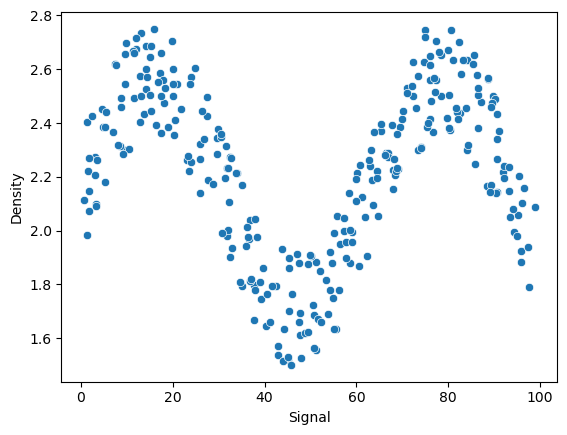

In [6]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [7]:
X = df['Signal'].values.reshape(-1,1)

In [8]:
y= df['Density']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr_model = LinearRegression()

In [13]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [14]:
lr_preds = lr_model.predict(X_test)

In [15]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [17]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [18]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [19]:
signal_range = np.arange(0,100)

<AxesSubplot:xlabel='Signal', ylabel='Density'>

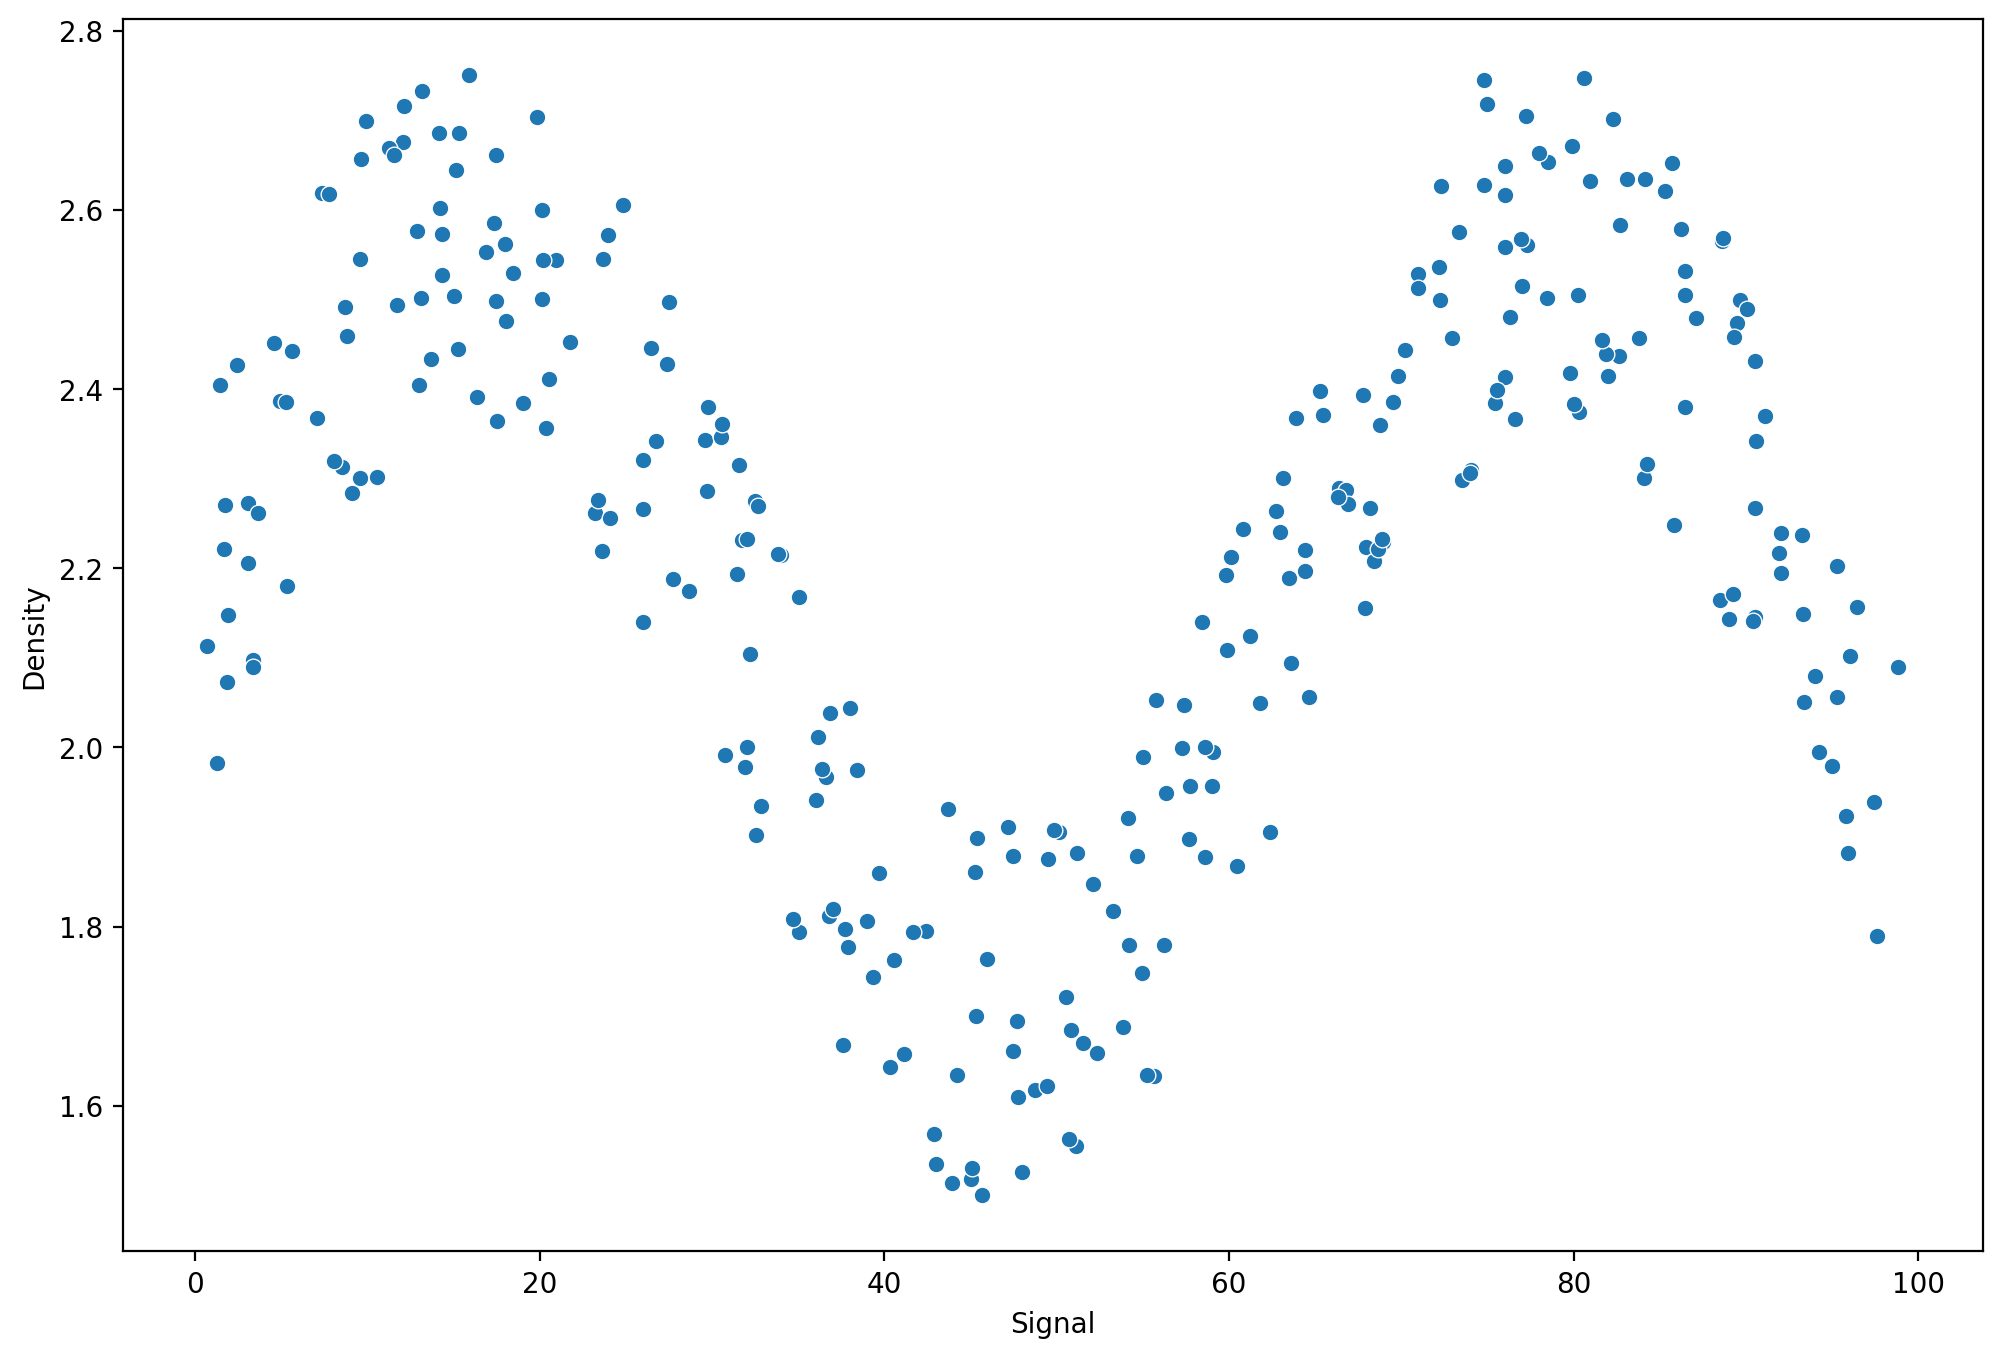

In [20]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

In [21]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

In [22]:
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

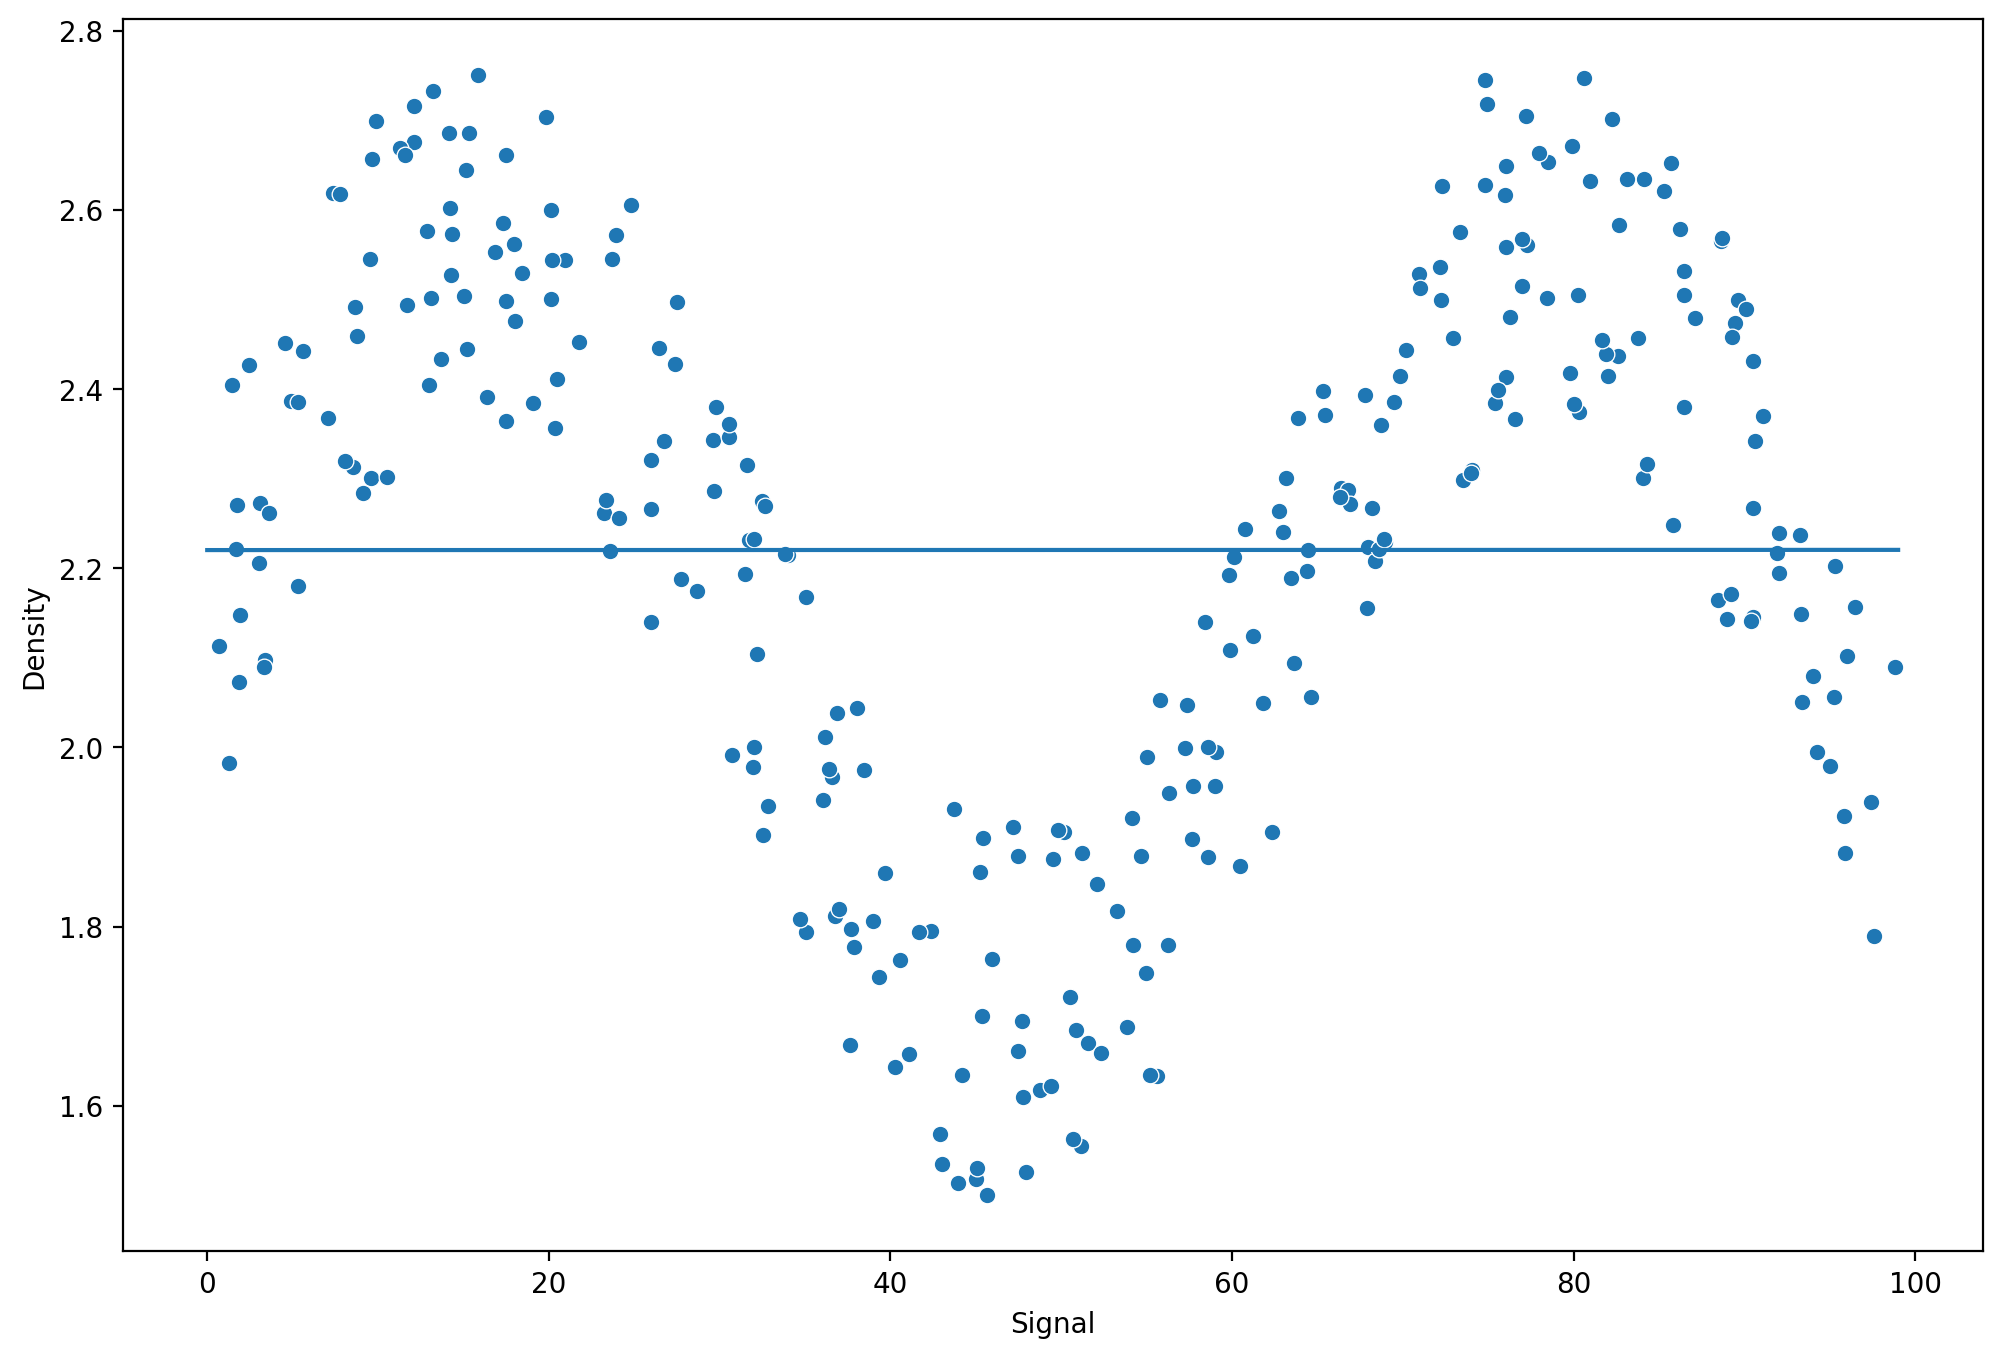

In [23]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)
plt.plot(signal_range,signal_preds)

In [26]:
#polynomial regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


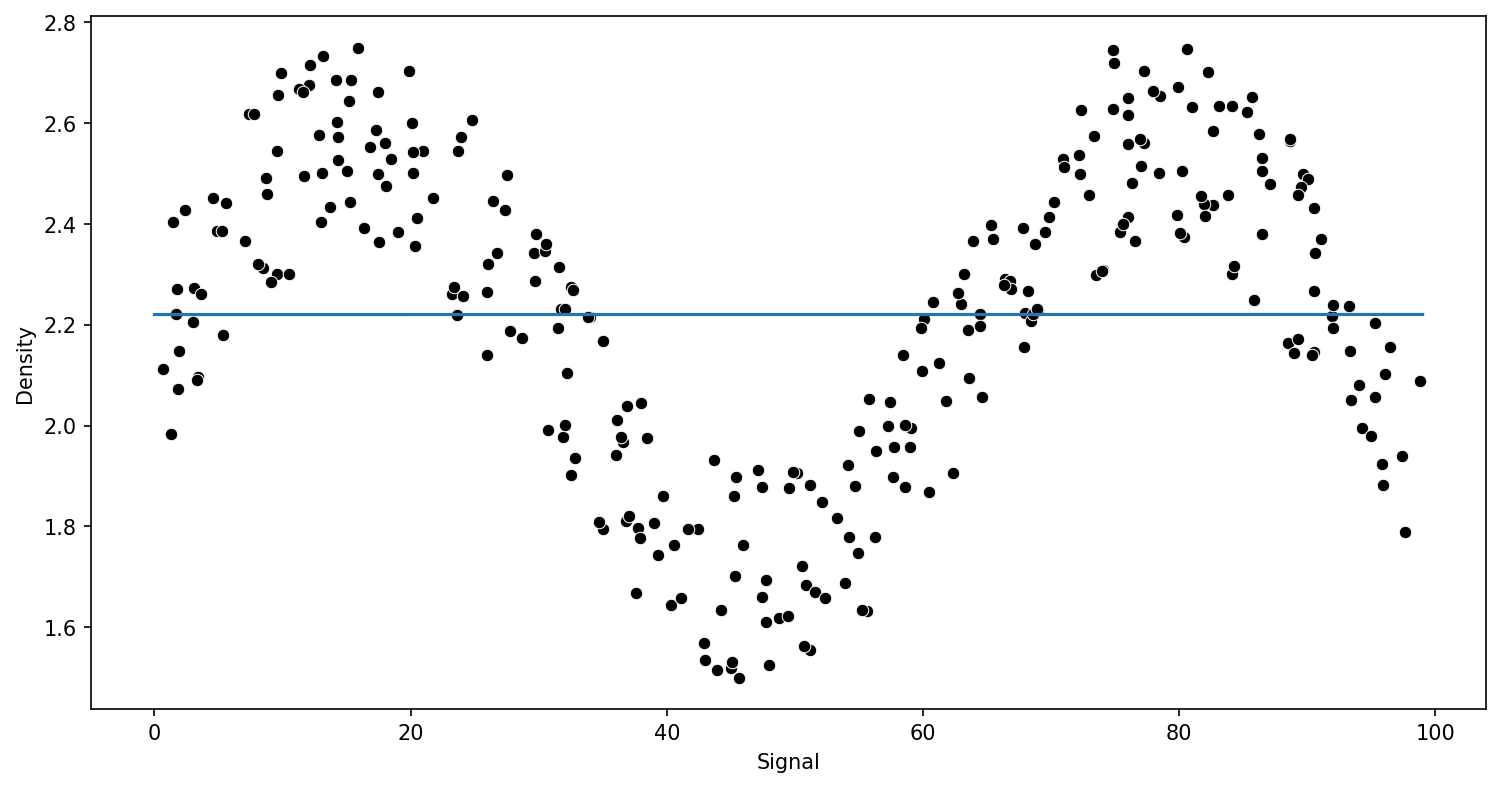

In [28]:
run_model(model,X_train,y_train,X_test,y_test)

In [29]:
#pipeline for poly order
from sklearn.pipeline import make_pipeline

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.2817309563725583


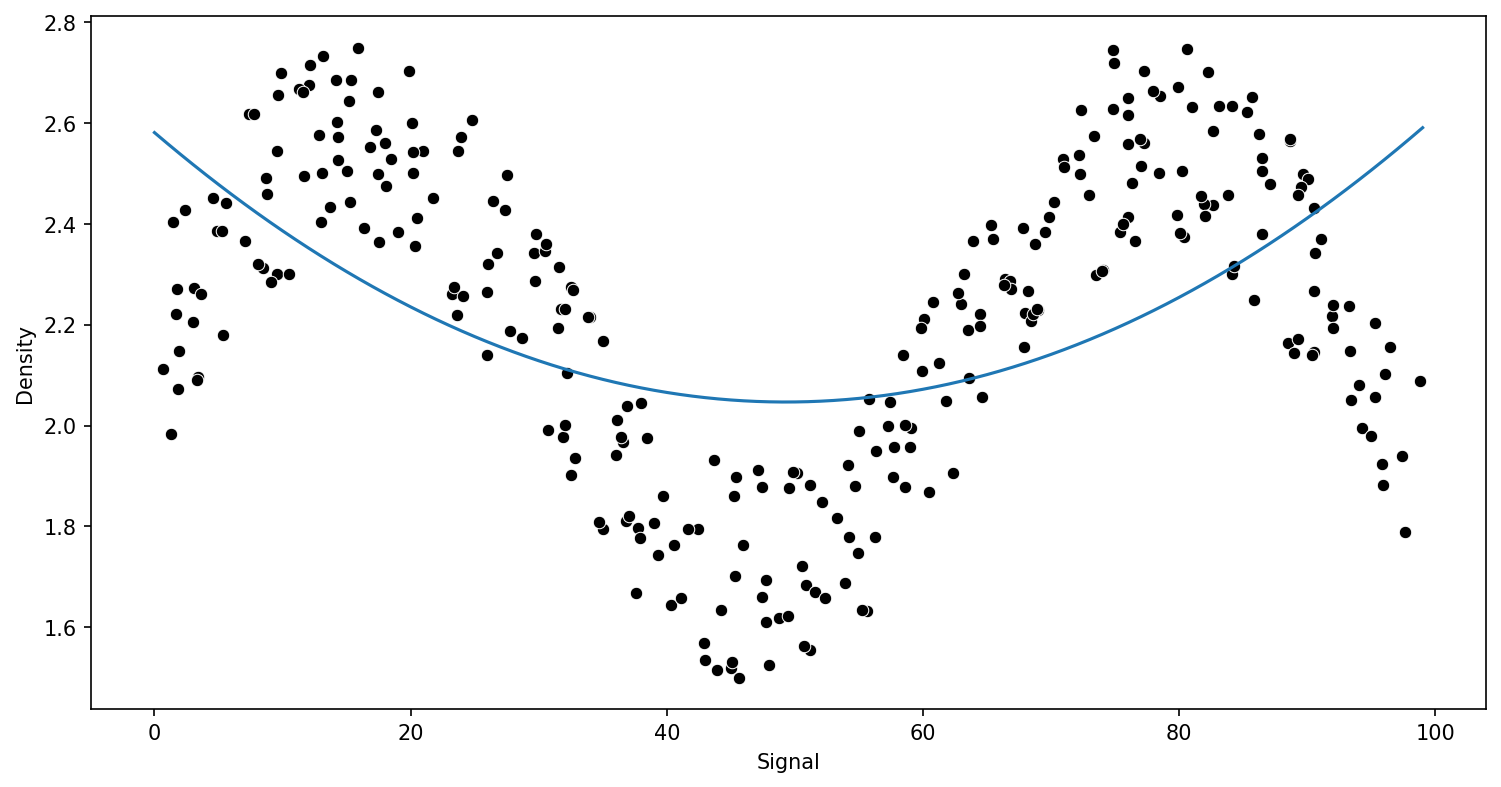

In [32]:
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.14034715212627238


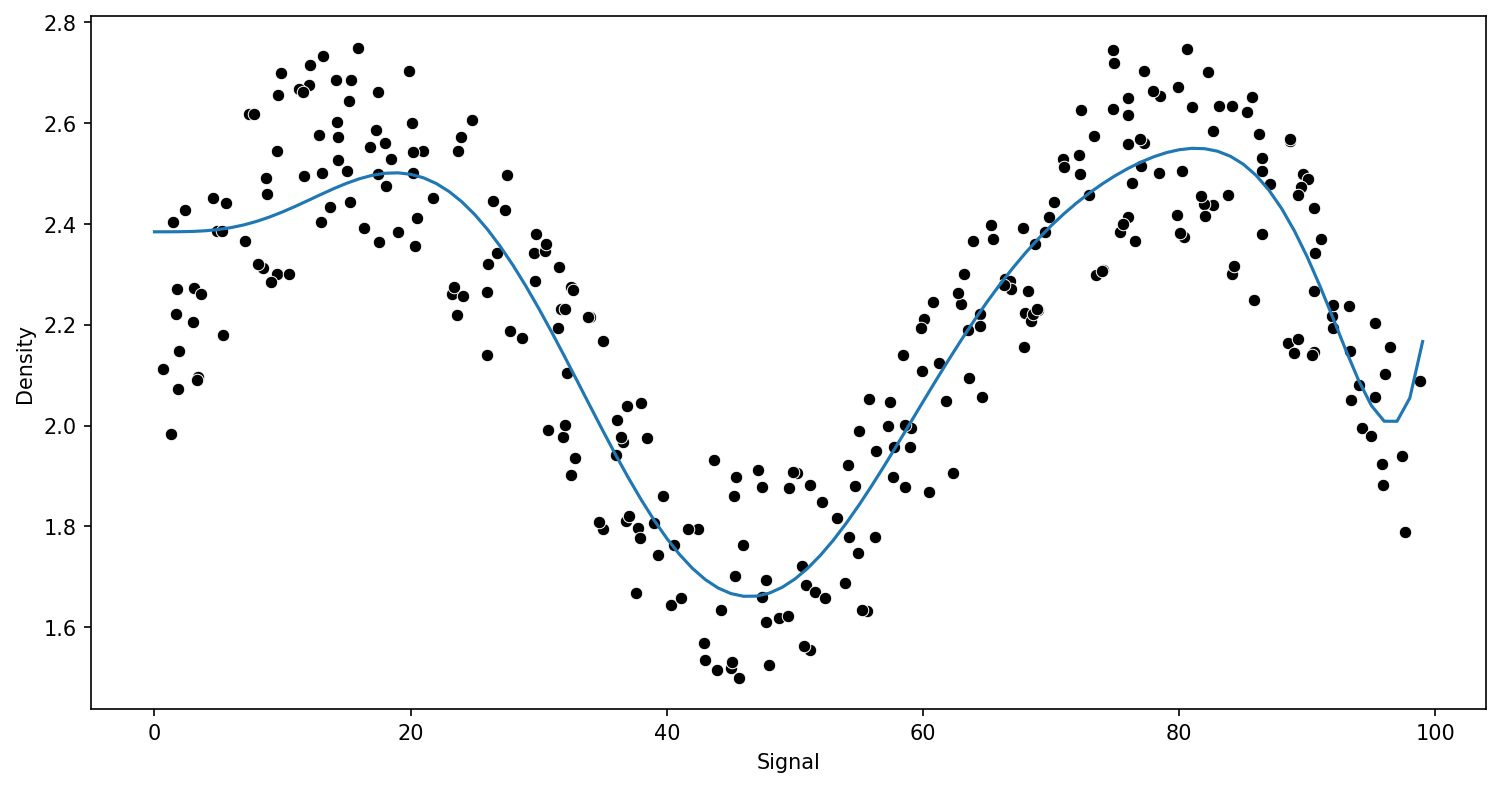

In [33]:
# comparing various poly orders
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

## KNN Regression

In [35]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


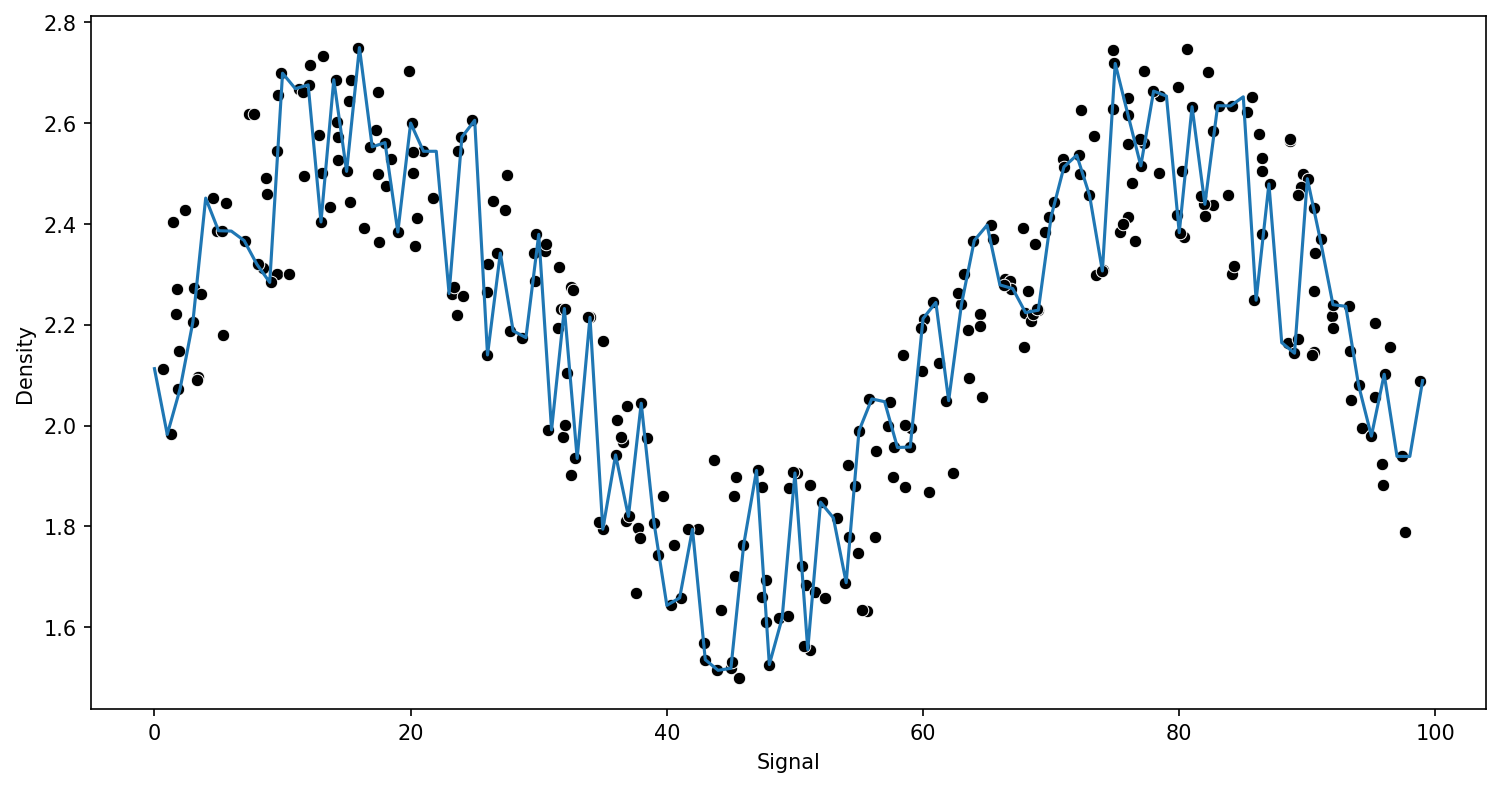

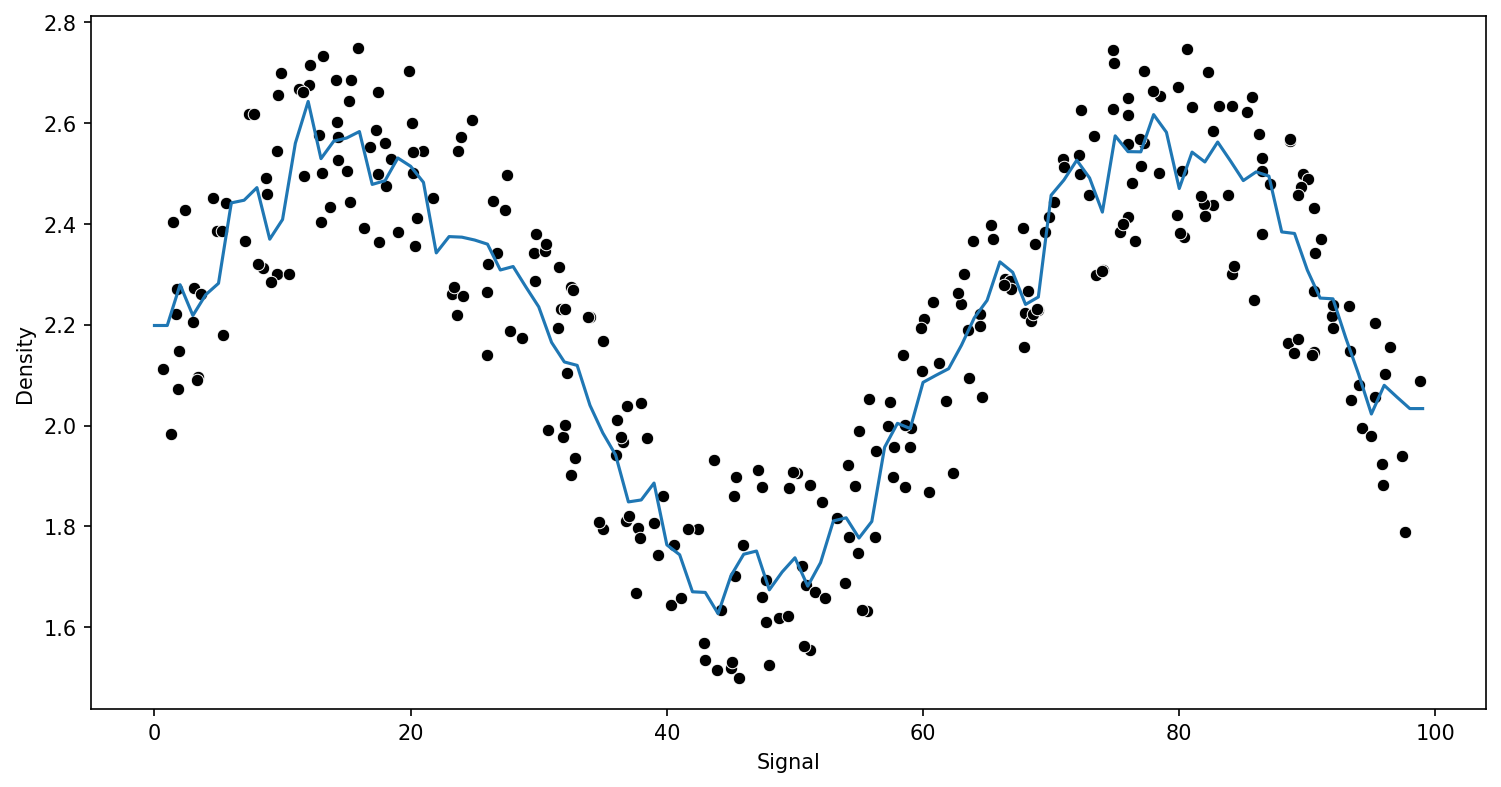

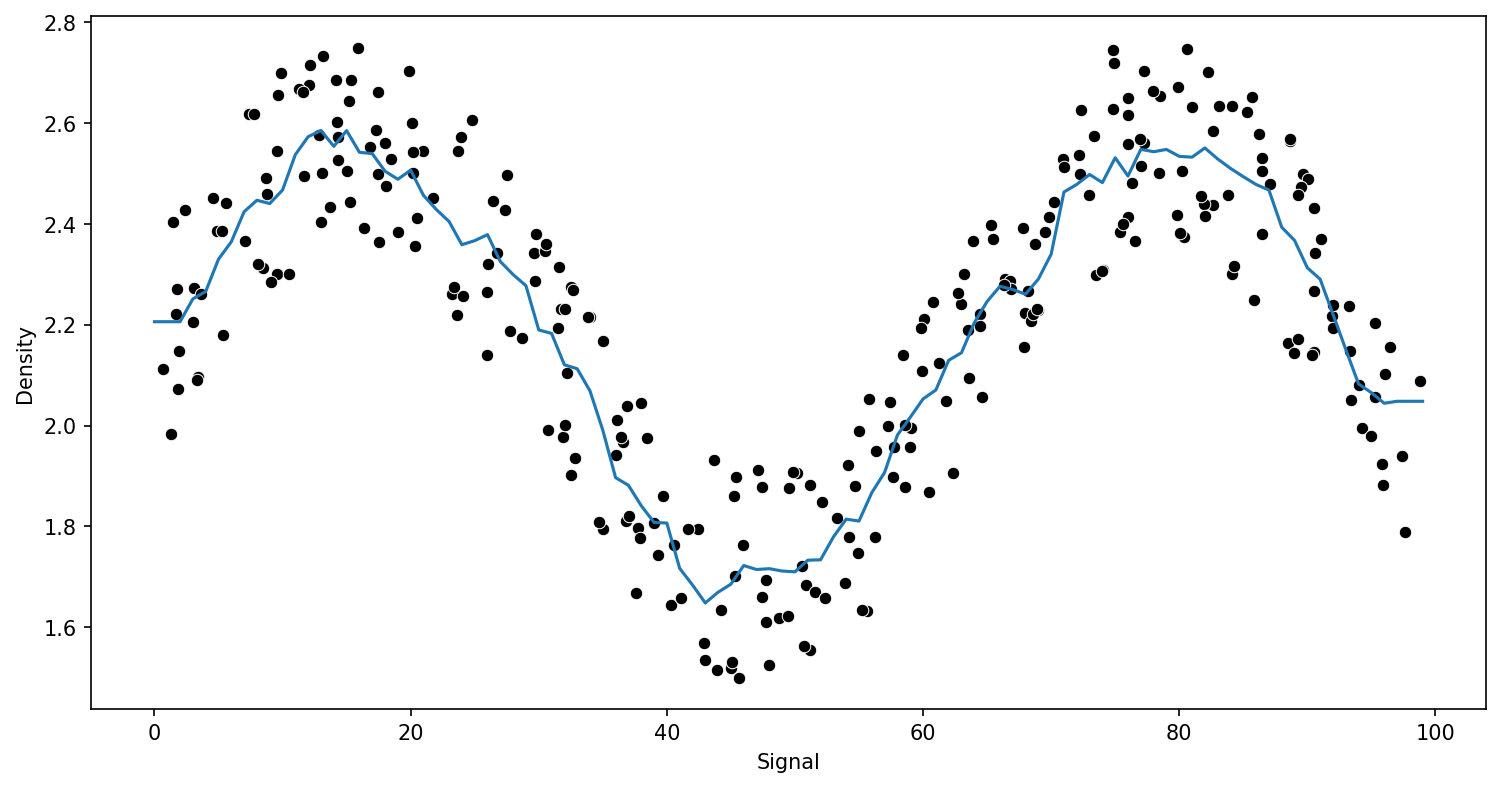

In [36]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

# Decision Tree Regression

In [37]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.1523487028635337


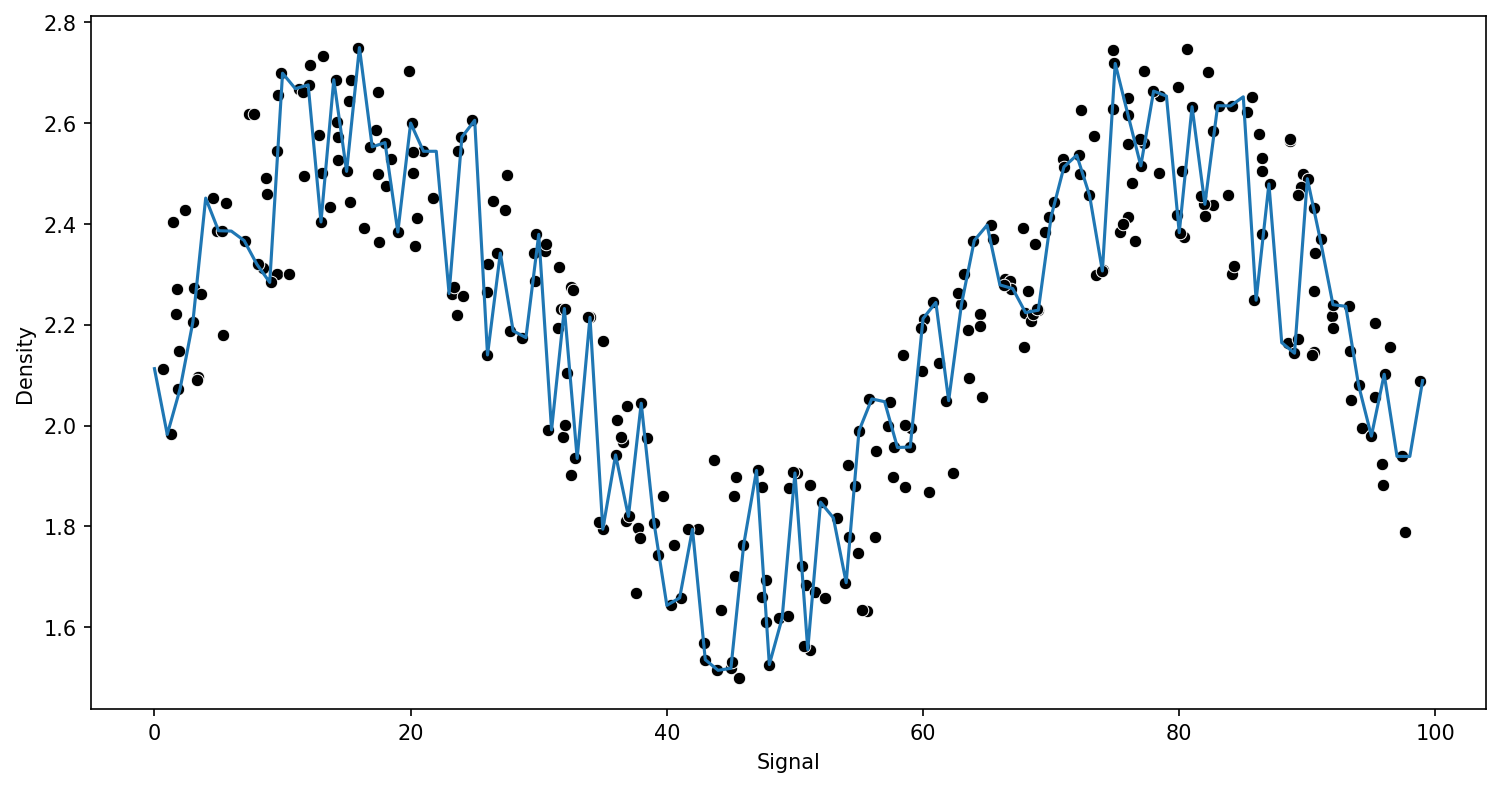

In [38]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [39]:
model.get_n_leaves()

270

# Support Vector Regression

In [40]:
from sklearn.svm import SVR

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [43]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12646999302046696


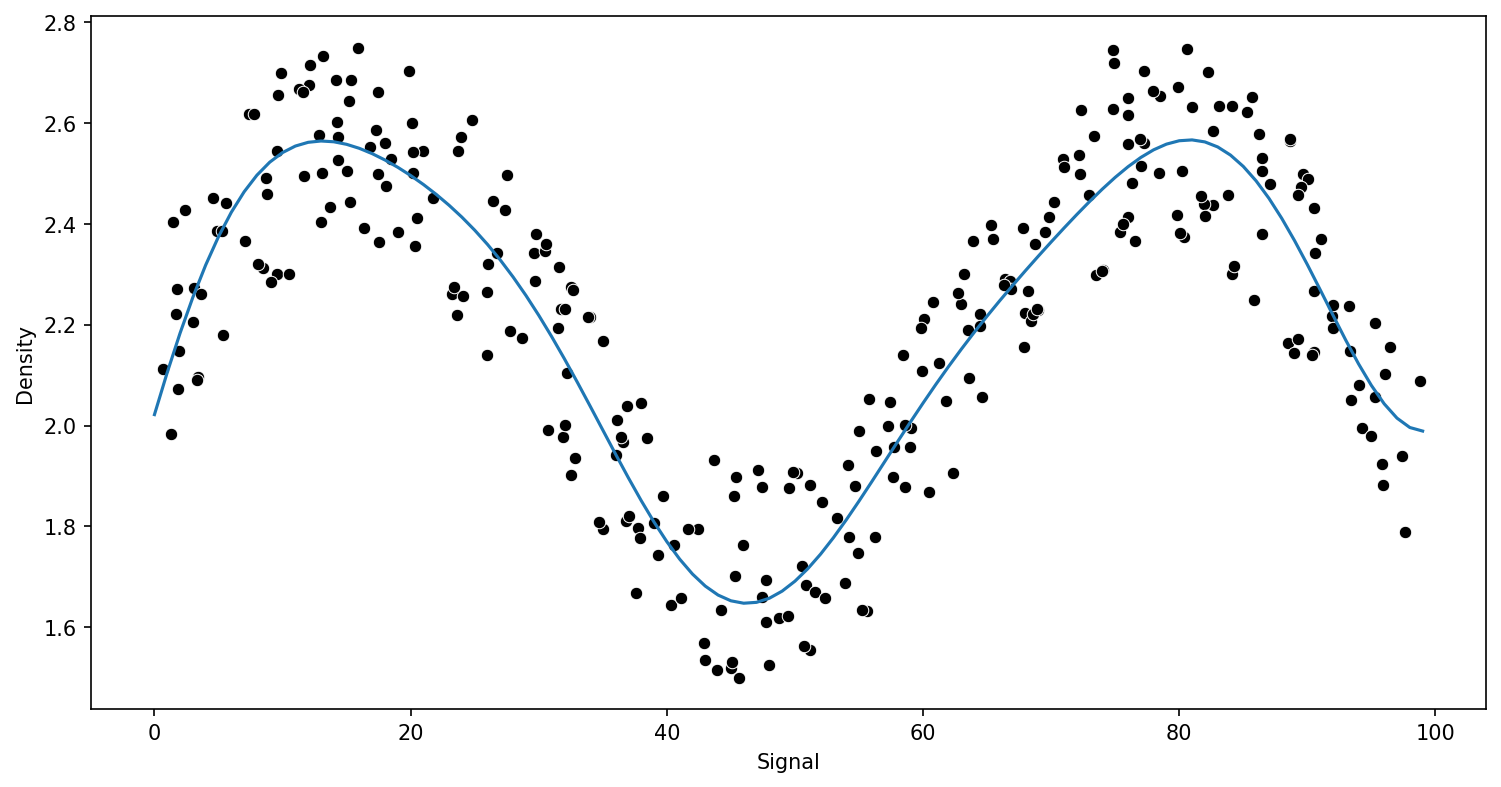

In [44]:
run_model(grid,X_train,y_train,X_test,y_test)

In [45]:
grid.best_estimator_

SVR(C=1000)

# Random Forest Regression

In [46]:
from sklearn.ensemble import RandomForestRegressor

RMSE : 0.13579841672200416
RMSE : 0.13449908808030464
RMSE : 0.13458635099204305


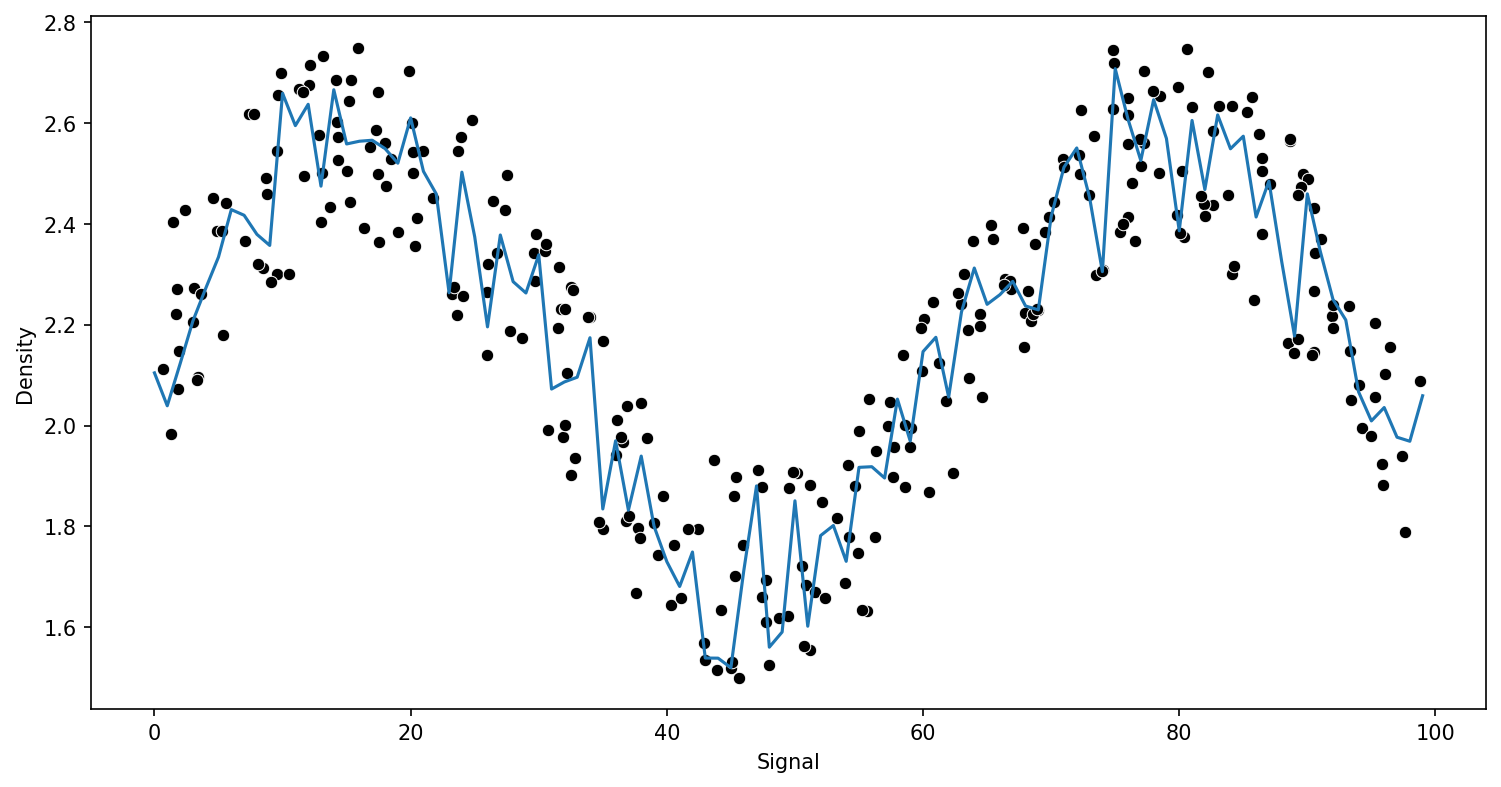

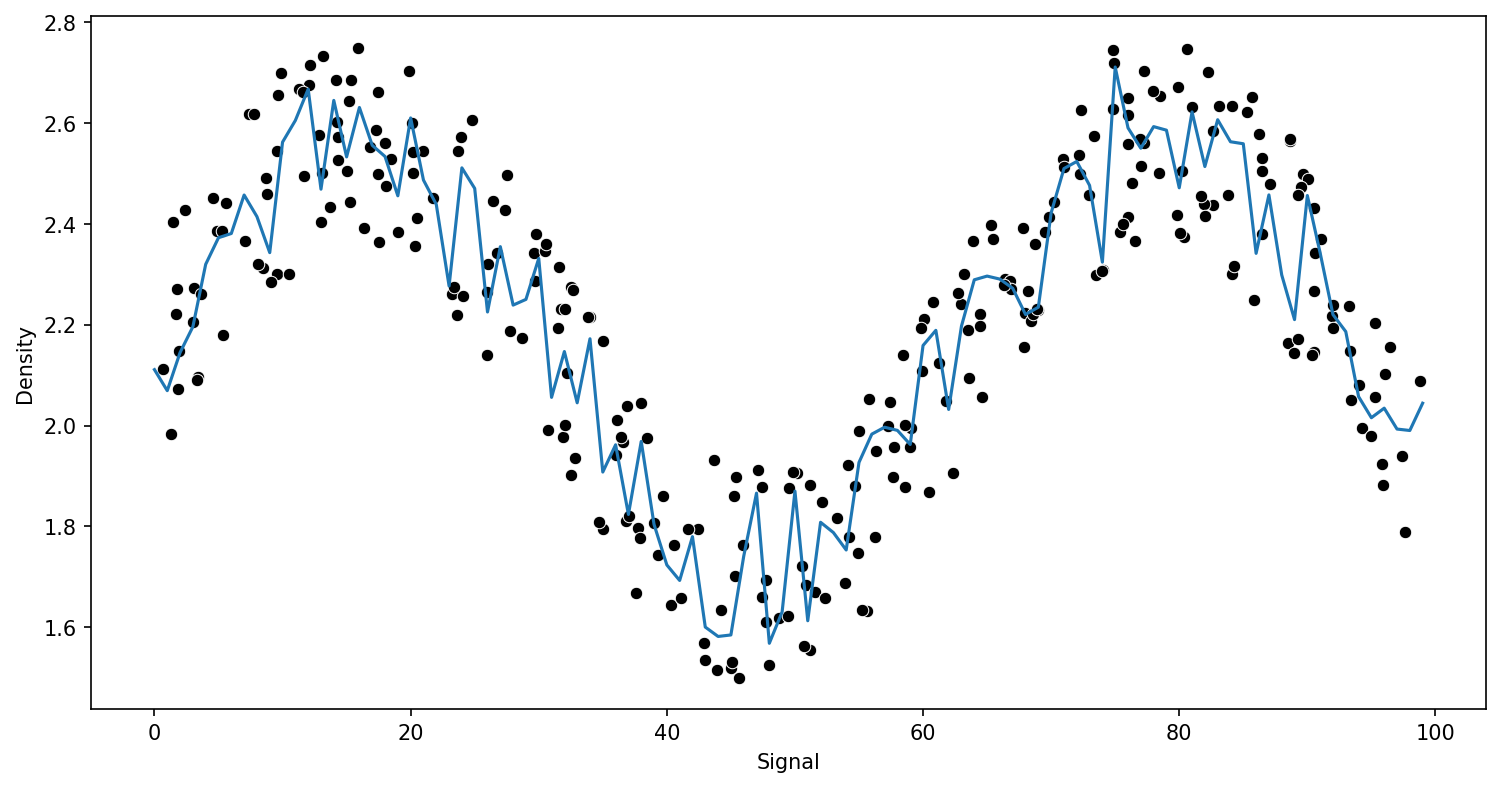

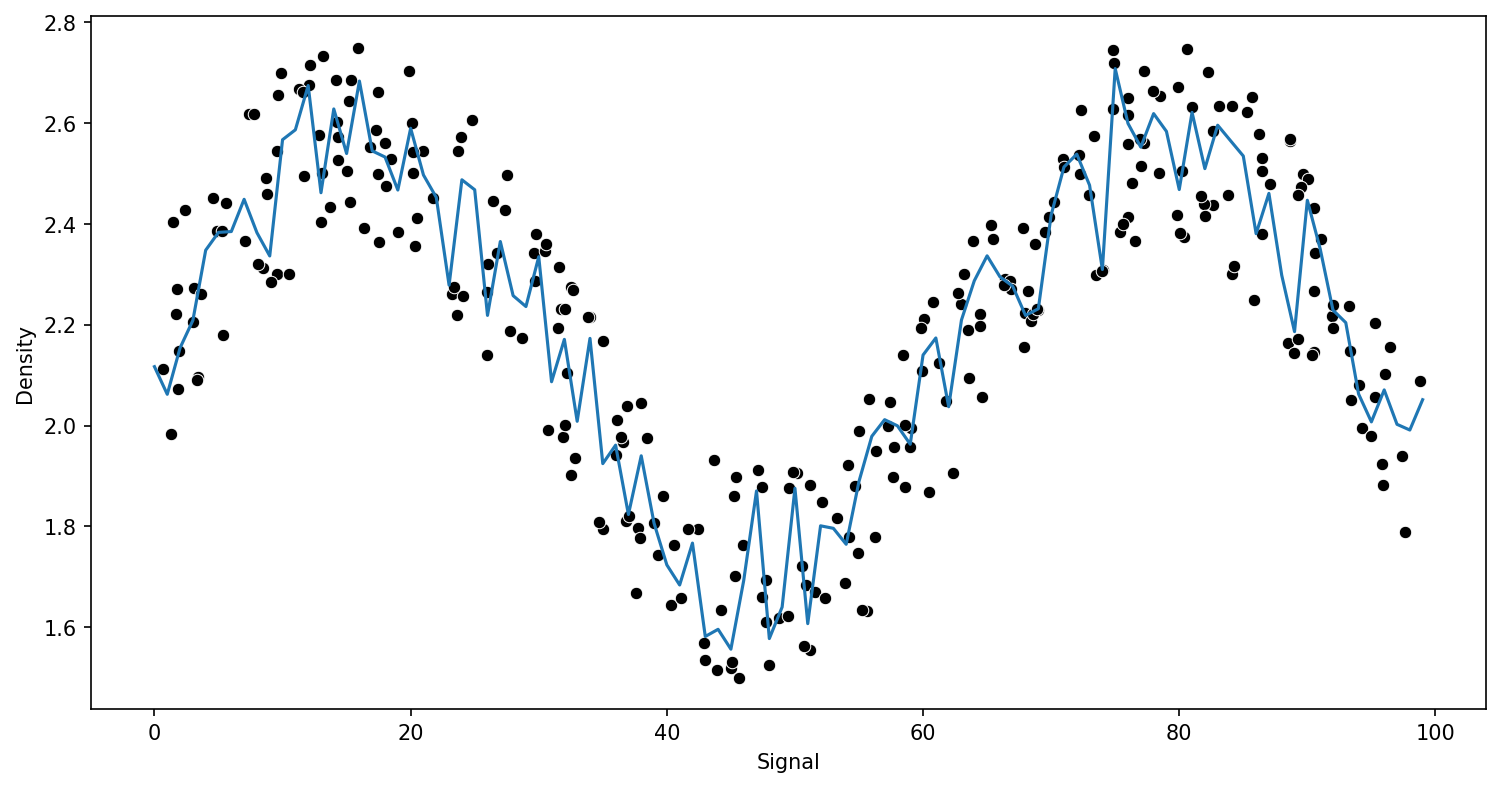

In [47]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

# Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE : 0.13294148649584667


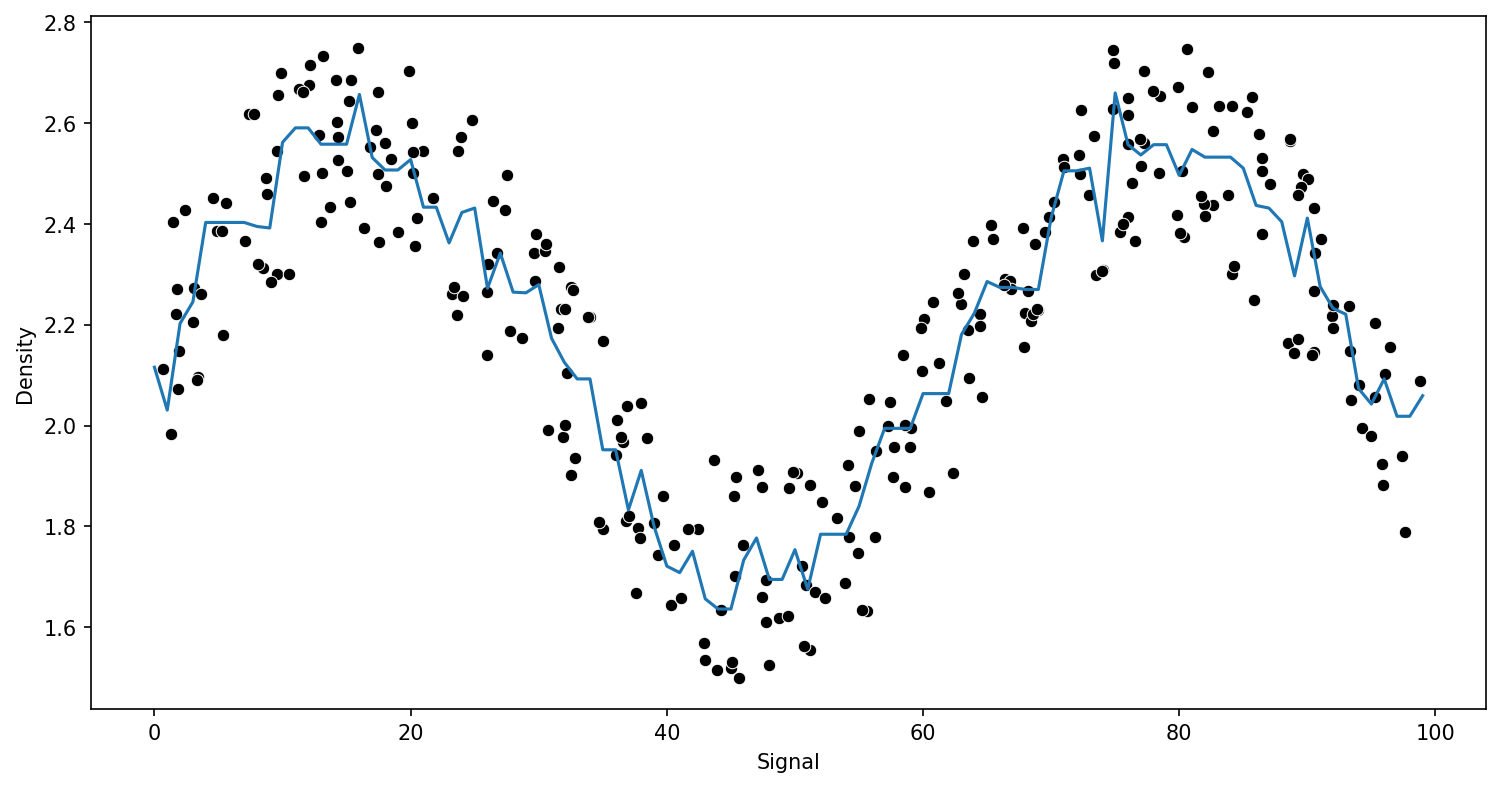

In [49]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

# Adaboost

In [50]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13294148649584667


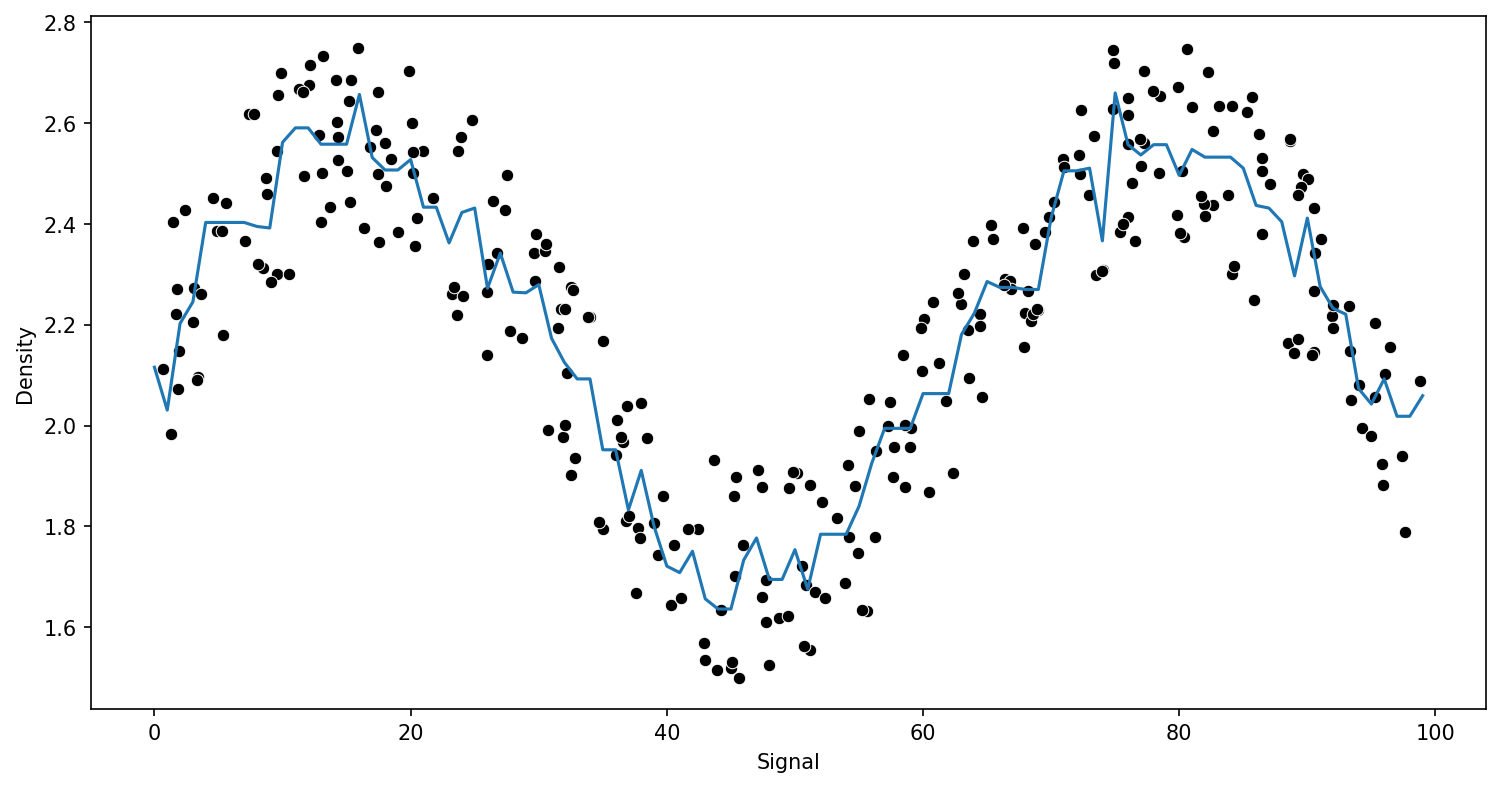

In [51]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)